## Preparations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

os.chdir("..")
from data_cleaning import prepare_data
from plotting import MessengerReport
from aesthetics import set_colors

In [2]:
# Set folder name - name of the folder where message files are saved
folder = "balkani_barcelona"

## Data cleaning

In [3]:
df = prepare_data(f"data/{folder}/", exclude_members=["Radványi Balázs", "Samu Varga"])

/Users/matevaradi/Repos/messenger-stats/data_cleaning.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content"] = df.content.fillna("")


In [4]:
df.head()

,sender_name,content,date_time,year,hour,weekday,month,reaction_Mate Varadi,reaction_Loósz Lőrinc,reaction_Bence Magyar,...,reaction_Kozma Gergő,reaction_Tamás Kökény,reaction_Botond Varga,reaction_Radványi Balázs,reaction_Karim Chorfi,reaction_Boti Eross,reaction_Péntek Balázs,reaction_Gáspár Varga,reaction_Doma Erőss,reaction_Tamás Kolmann
0,Botond Varga,be kell meg potolni,2022-04-24 22:19:16.037,2022,22,6,202204,,,,...,,❤,,,,👍,,,,
1,Botond Varga,ja amugy azt,2022-04-24 22:19:12.607,2022,22,6,202204,,,,...,,,,,,,,,,
2,Boti Eross,ott mit mentünk volna,2022-04-24 22:19:05.444,2022,22,6,202204,,,,...,👍,,,,,,,,,
3,Boti Eross,fu de kár h elmaradt barcelona,2022-04-24 22:18:59.288,2022,22,6,202204,,,,...,,,,,,,,,,
4,Kozma Gergő,nekik foldvaron van b haz ami ures,2022-04-23 20:39:00.662,2022,20,5,202204,,,,...,,,,,,,,,,


In [5]:
# Save data
df.to_csv(f"data/{folder}/{folder}.csv", index=False)

## Analysis

In [6]:
members = sorted(df.sender_name.unique().tolist())
color_dict = set_colors(members)
mr = MessengerReport(data=df, 
                     color_dict=color_dict,
                     folder_name=folder)

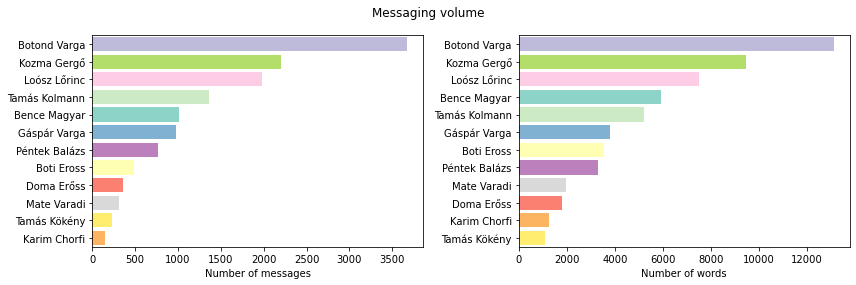

In [7]:
mr.plot_message_volume()

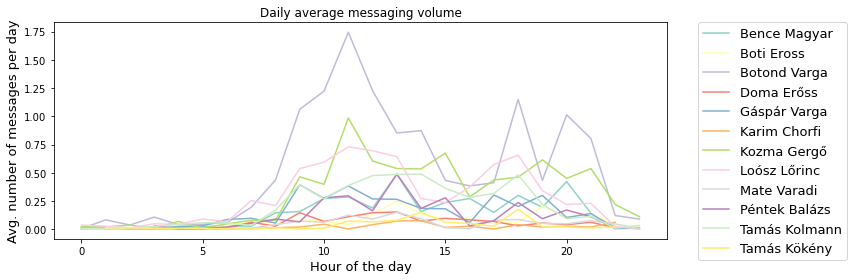

In [8]:
mr.plot_daily_use()

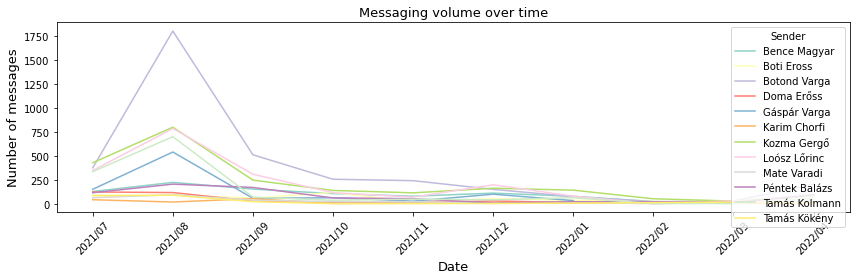

In [9]:
mr.plot_historic_use()

In [10]:
mr.sample_messages_with_emoji("❤", threshold=4)

fuhh de kivittuk ezt a balkani barcelonat gyerekek
  sent by Doma Erőss, received ❤❤❤❤👍


legjobb nyar volt, koszi nektek!
  sent by Mate Varadi, received ❤❤❤❤❤❤❤❤❤❤


mintha kicsereltek volna az agyamat
  sent by Doma Erőss, received 👍❤👍❤❤❤


életem legparábbja volt, soha nem buliztam meg ilyen jo brigaddal
  sent by Loósz Lőrinc, received ❤❤❤❤❤❤❤❤❤❤


boti neked kulon orok hala, gondoltam hogy privatban ezt megbeszeljuk, de igazabol szerintem jo ha tudja mindenki a te szerepvallalasodat.
 hajnaltol ma delutanig konkretan arra szantad minden perced, hogy nekem segits, segitettel intezni a mentot, folyamatosan kapcsolatban voltal viraggal, atjottetek villovel nyugtatni ot, hivtad a korhazat es erdeklodtel az allapotomrol, elmentel a kopenyedert es az autodert hogy be tudj jonni hozzam es haza tudj hozni, es meg ki tudja mi minden volt amit nem tudok - elkepesztoen koszonom es remelem meg tudjuk halalni valahogy ❤️
  sent by Karim Chorfi, received ❤❤❤❤


@tamás kökény
  sent by Kozma Ge

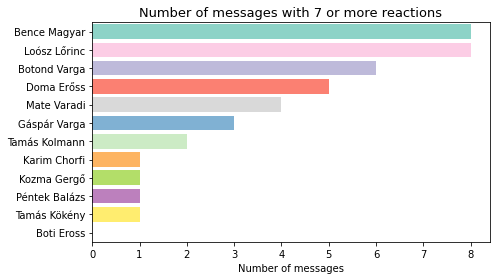

In [11]:
mr.plot_emoji_received("😆", threshold=7)

/Users/matevaradi/Repos/messenger-stats/plotting.py:404: UserWarning: Glyph 108 (l) missing from current font.
  fig.savefig(f"results/{self.folder_name}/reactions.png", dpi=300)
/Users/matevaradi/Repos/messenger-stats/plotting.py:404: UserWarning: Glyph 112 (p) missing from current font.
  fig.savefig(f"results/{self.folder_name}/reactions.png", dpi=300)
/Users/matevaradi/Repos/messenger-stats/plotting.py:404: UserWarning: Glyph 129436 (\N{PARROT}) missing from current font.
  fig.savefig(f"results/{self.folder_name}/reactions.png", dpi=300)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/py

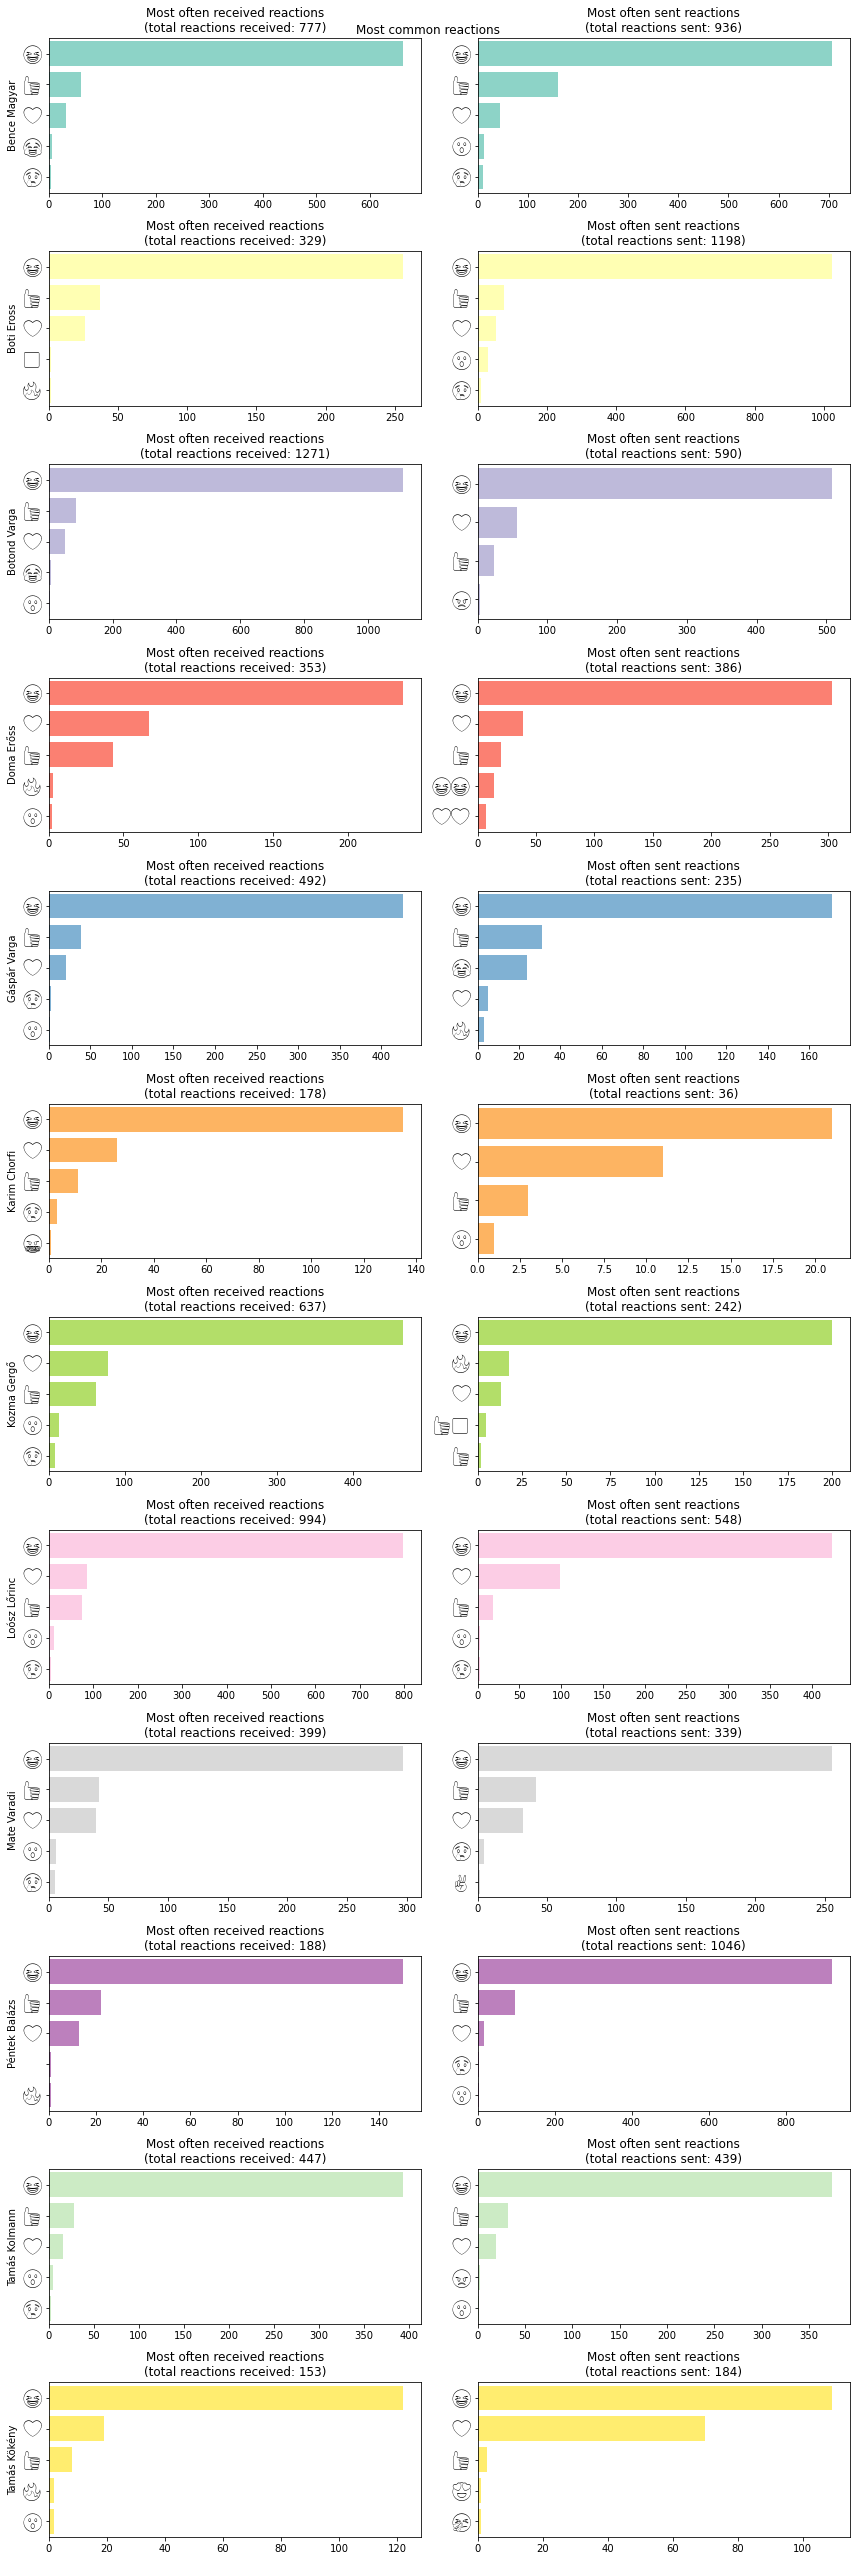

In [12]:
mr.plot_reactions()

/Users/matevaradi/Repos/messenger-stats/plotting.py:473: UserWarning: Glyph 108 (l) missing from current font.
  fig.savefig(f"results/{self.folder_name}/network_of_{emoji}", dpi=300)
/Users/matevaradi/Repos/messenger-stats/plotting.py:473: UserWarning: Glyph 112 (p) missing from current font.
  fig.savefig(f"results/{self.folder_name}/network_of_{emoji}", dpi=300)


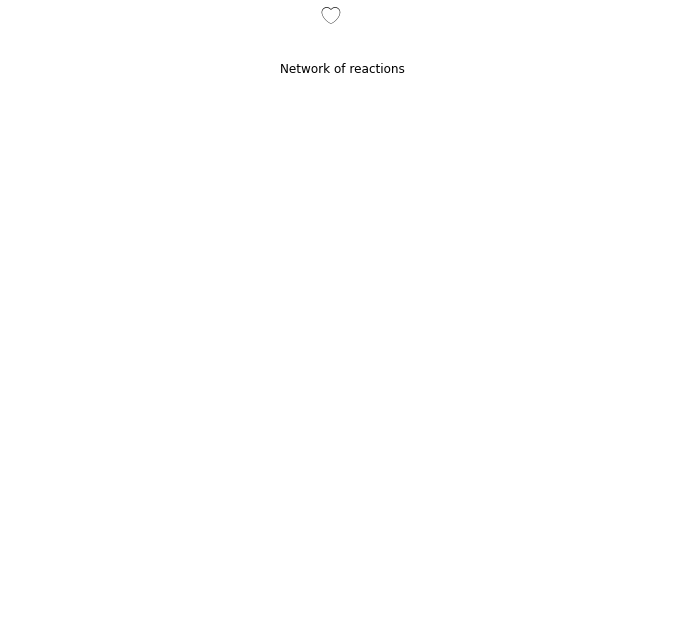

In [13]:
mr.plot_reaction_network("❤️")

/Users/matevaradi/Repos/messenger-stats/plotting.py:482: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:482: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:482: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:482: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:538: UserWarning: Glyph 108 (l) missing from current font.
  report_pdf.savefig(plot, bbox_inches="tight", pad_inches=0.2)
/Users/matevaradi/Repos/messenger-stats/plotting.py:538: UserWarning: Glyph 112 (p) missing from current font.
  report_pdf.savefig(plot, bbox_inches="tight", pad_inches=0.2)
/Users/matevaradi/Repos/messenger-stats/plotting.py:538: UserWarning: Glyph 129436 (\N{PARROT}) missing from current font.

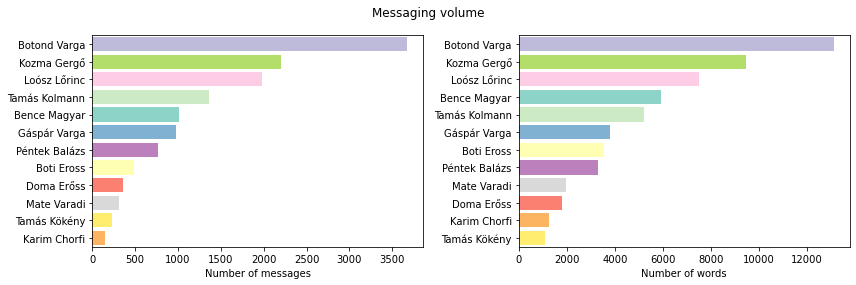

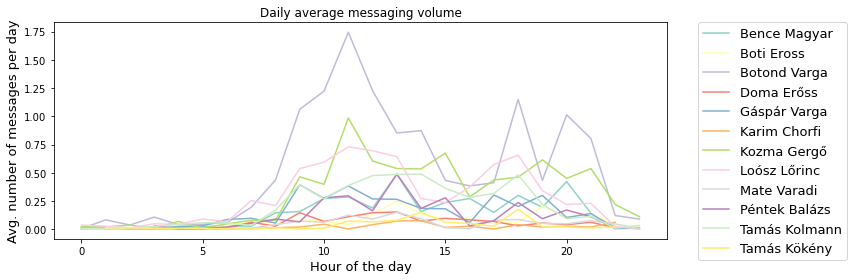

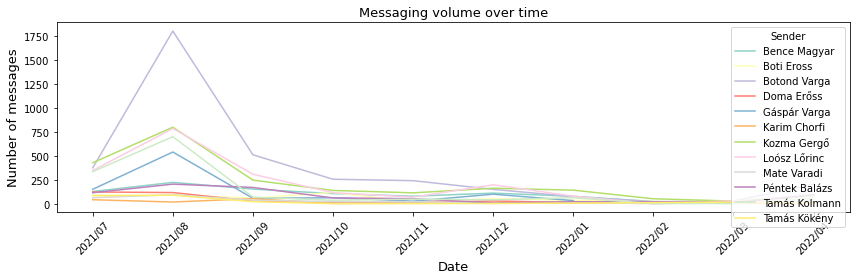

/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129436 (\N{PARROT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


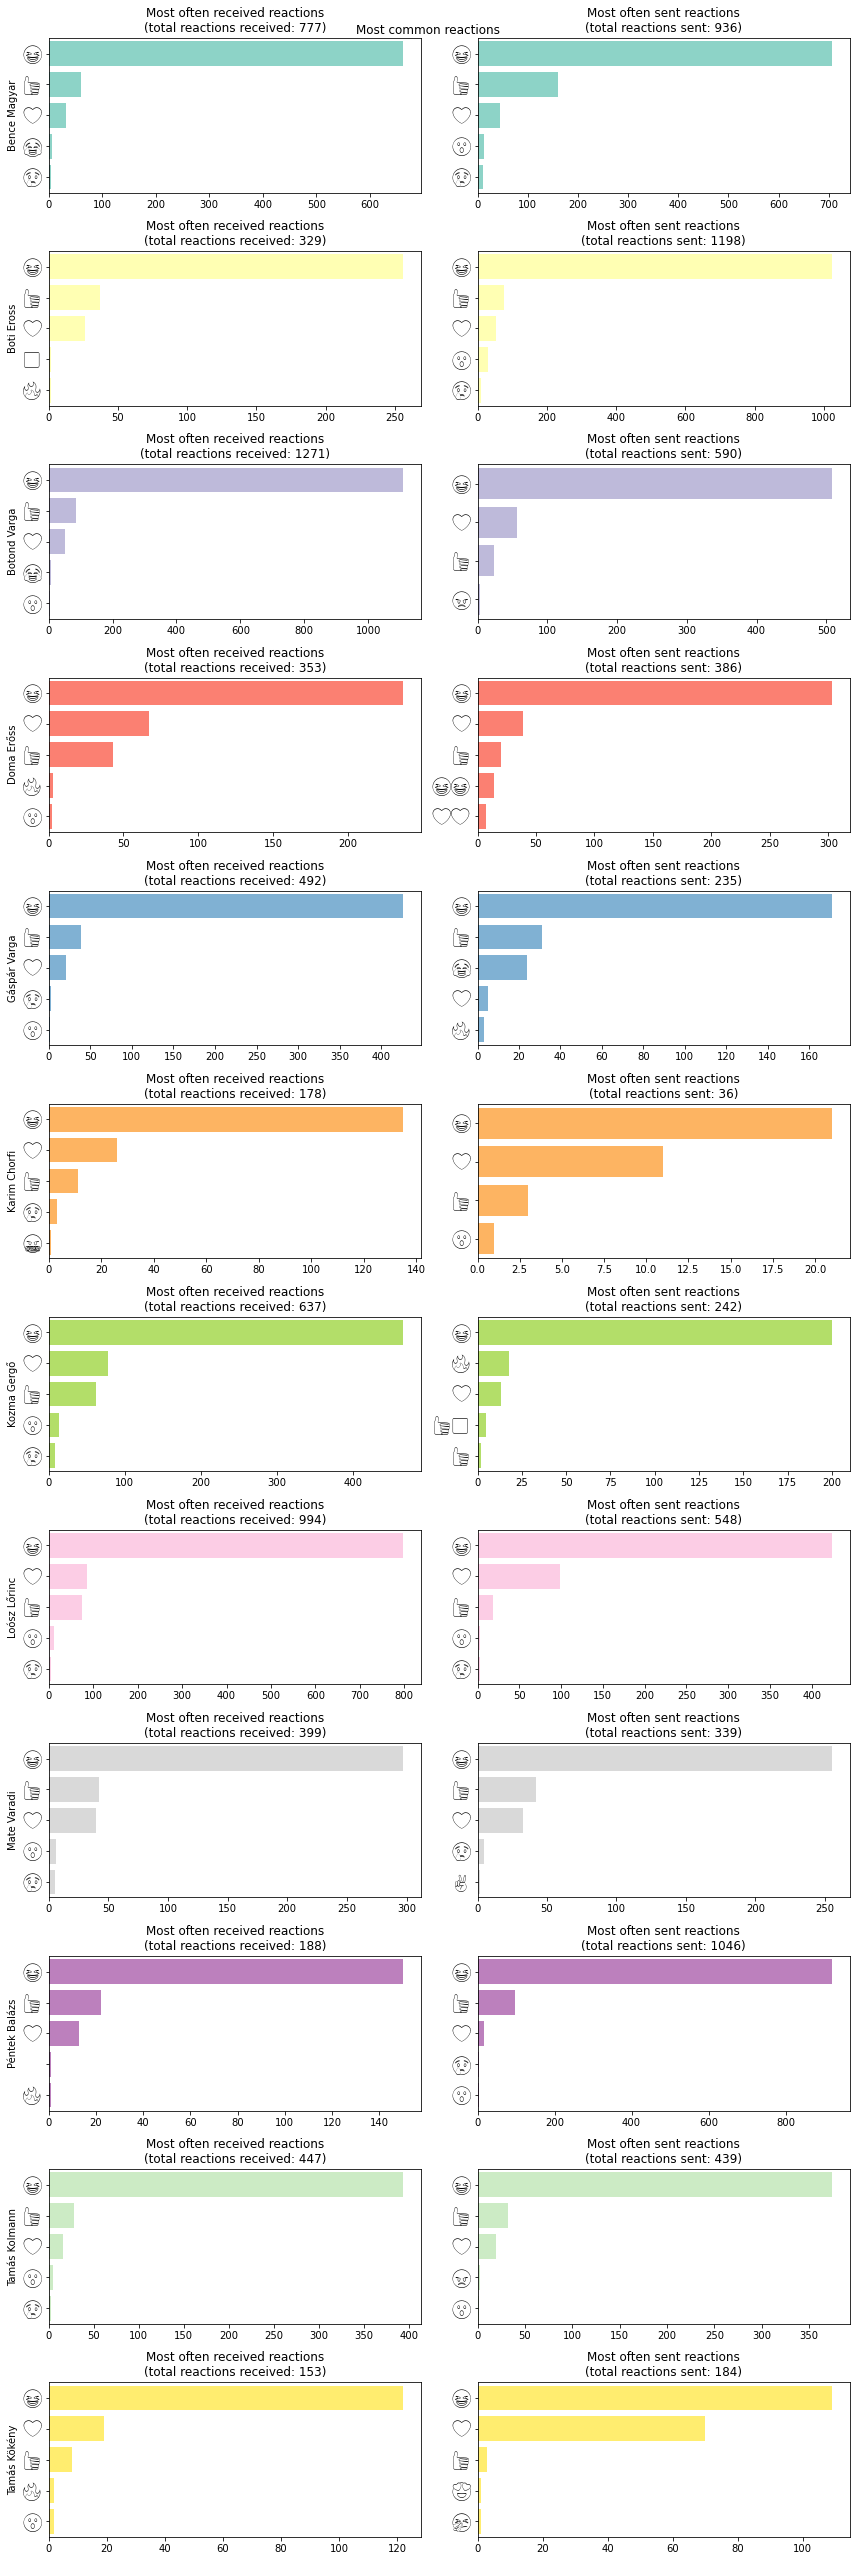

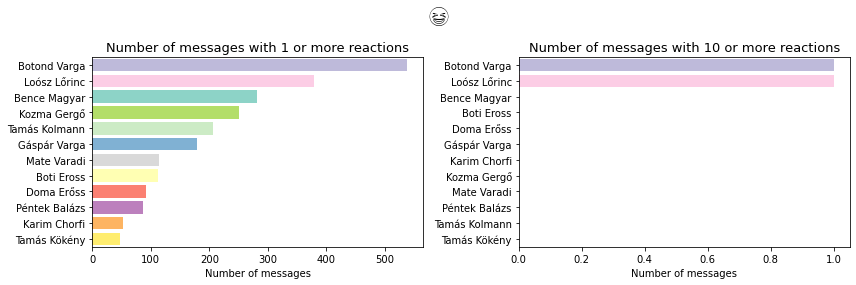

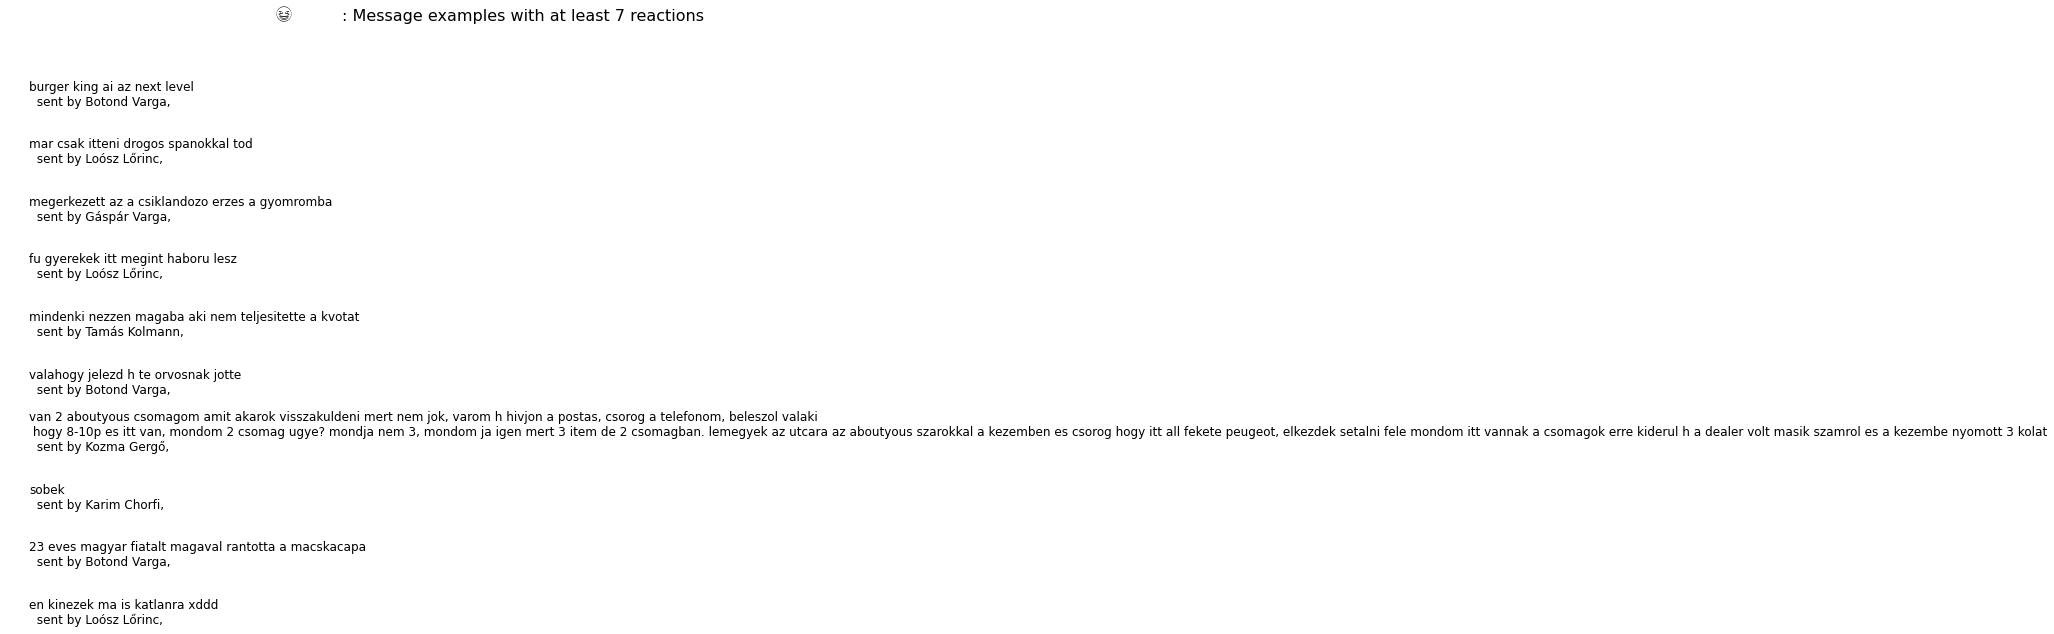

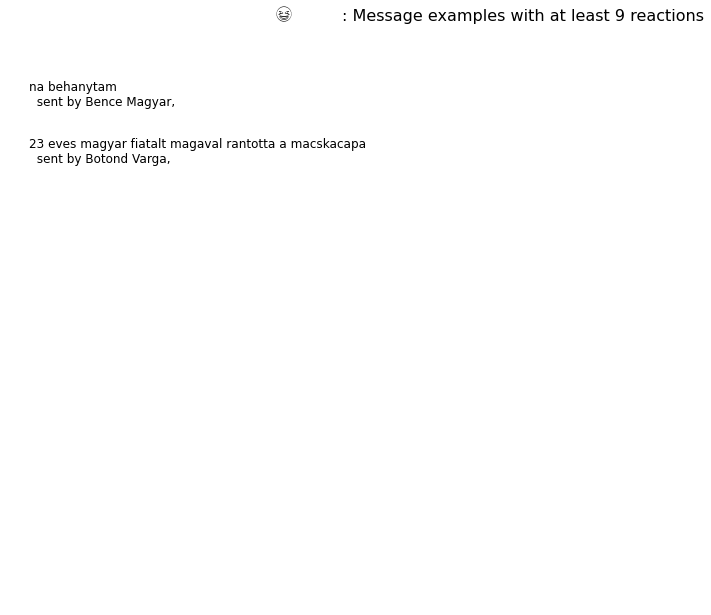

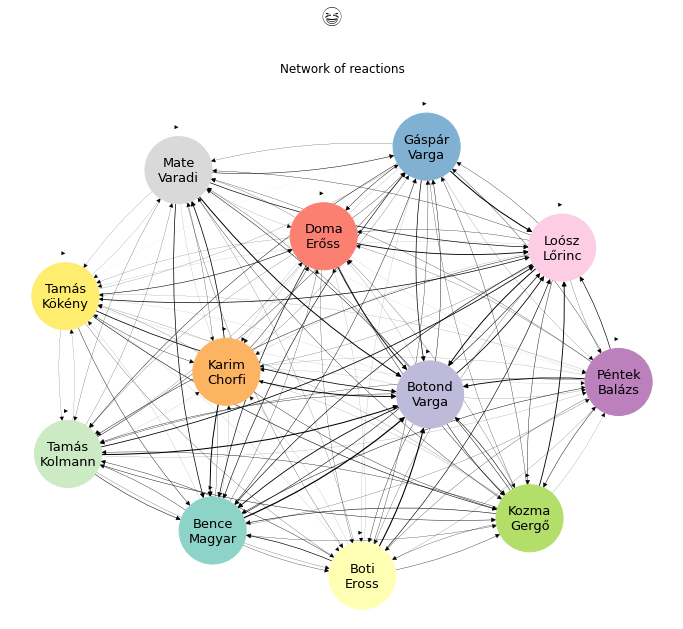

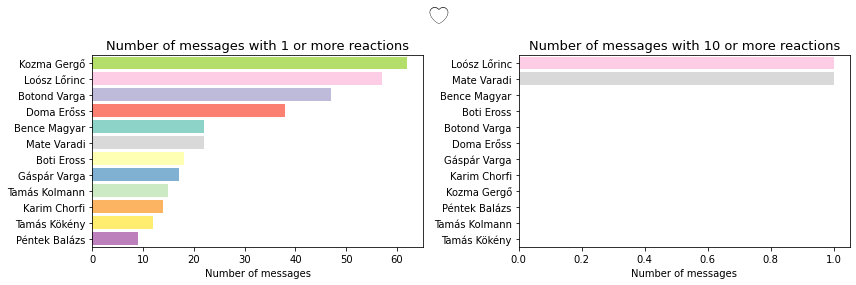

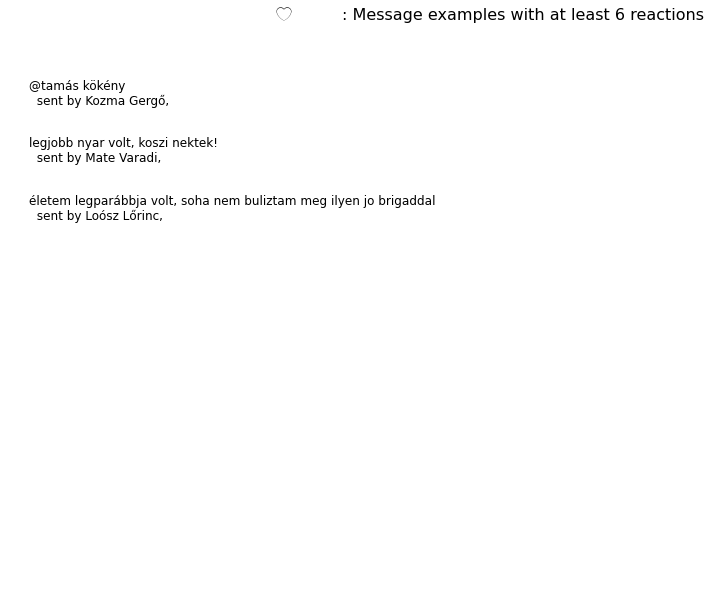

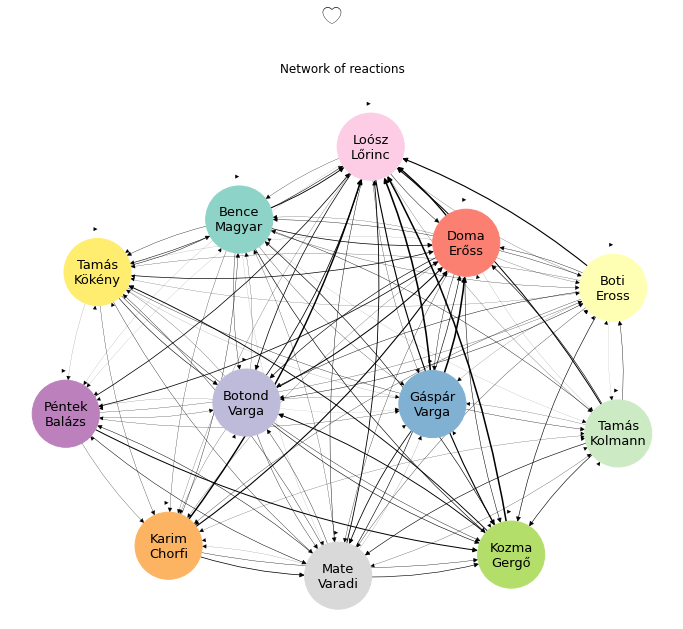

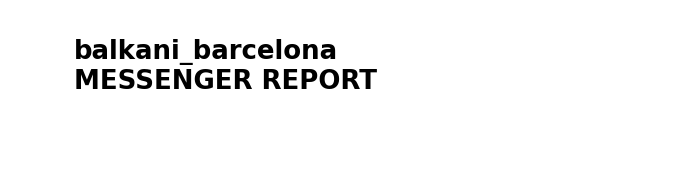

In [14]:
mr.pdf_report()

In [19]:
s= " a dnfs lam aenkjrsnl möan roisö lmkö, ael mö, p oip4 an jksl möadsfd jklsm jknlmaelaköjd   lkk aöe lk. nmas lk  ad. uij kl nj. hbjasdl kj jk hj ök jk jk ölö ht f ll ö ä ö kj "

In [32]:
def nth_repl_all(s, sub, repl, nth):
    find = s.find(sub)
    # loop util we find no match
    i = 1
    while find != -1:
        # if i  is equal to nth we found nth matches so replace
        if i == nth:
            s = s[:find]+repl+s[find + len(sub):]
            i = 0
        # find + len(sub) + 1 means we start after the last match
        find = s.find(sub, find + len(sub) + 1)
        i += 1
    return s

In [33]:
nth_repl_all(s, " ", "\n", 20)

' a dnfs lam aenkjrsnl möan roisö lmkö, ael mö, p oip4 an jksl möadsfd jklsm jknlmaelaköjd   lkk aöe\nlk. nmas lk  ad. uij kl nj. hbjasdl kj jk hj ök jk jk ölö ht f ll ö ä\nö kj '